In [1]:
import numpy as np
import pickle
import lzma
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.typing import NDArray
from experiment import AgentStats, Results
from typing import List, Dict


/home/alessior/anaconda3/envs/exploration-maze/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
TITLE_SIZE = 22
LEGEND_SIZE = 14
TICK_SIZE = 14
AXIS_TITLE = TITLE_SIZE-4
AXIS_LABEL = 16
FONT_SIZE = TITLE_SIZE-4

rc_parameters = {
    "font.size": FONT_SIZE,
    "axes.titlesize": AXIS_TITLE,
    "axes.labelsize": AXIS_LABEL,
    "xtick.labelsize": TICK_SIZE,
    "ytick.labelsize": TICK_SIZE,
    "legend.fontsize": LEGEND_SIZE,
    "figure.titlesize": TITLE_SIZE,
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,  # use inline math for ticks
    "pgf.rcfonts": False,  # don't setup fonts from rc parameters
    "pgf.preamble": [
        r'\usepackage{amsmath}',
    ]
}
plt.rcParams.update(rc_parameters)


In [3]:
agents = ['boot_dqn_torch_modified', 'explorative','boot_dqn_torch','ids']
sizes = [1,3,5,10]
data = {}
for agent in agents:
    data[agent] = {}
    for size in sizes:
        with lzma.open(f'data/data_{size}_{agent}.pkl', 'rb') as f:
            data[agent][size] = pickle.load(f)

In [4]:
T = 200

LABELS = {
    'boot_dqn_torch': 'BSP',
    'boot_dqn_torch_modified': 'BSP2',
    'explorative': 'DBMF-BPI',
    'ids': 'IDS',

}

def get_cumulative_upright(results: List[Results], T: int) -> NDArray[np.float64]:
    df = pd.DataFrame({'Episode': [], 'Value': []})
    ret = []
    for i in range(len(results)):
        ret.append(np.cumsum([np.sum(results[i].agent_stats.episodes_rewards[x] > 0) for x in range(T)]))
        for j, val in enumerate(ret[-1]):
            df.loc[len(df)] = [j, val]
    return np.vstack(ret), df


def get_cumulative_upright_full(results: Dict[str, Dict[int, List[Results]]], agents: List[str], sizes: List[int], T: int) -> NDArray[np.float64]:
    df = pd.DataFrame({'n': [], 'Value': [], 'Agent': []})
    for agent in agents:
        for size in sizes:
            for i in range(len(results[agent][size])):
                ret = np.cumsum([np.sum(results[agent][size][i].agent_stats.episodes_rewards[x] > 0) for x in range(T)])
                df.loc[len(df)] = [size, ret[-1], LABELS[agent]]
    return df




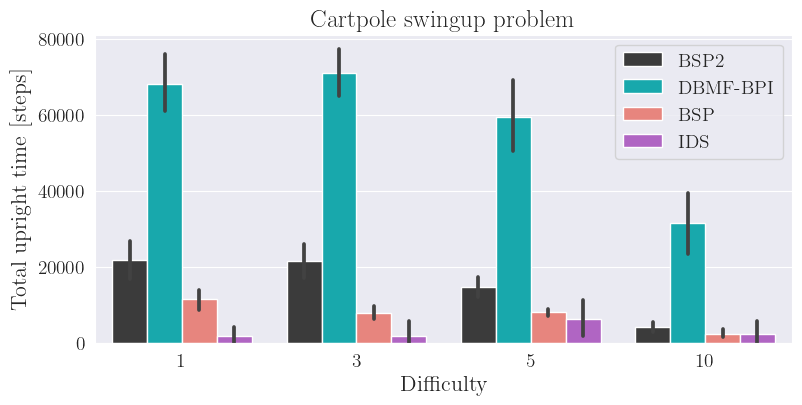

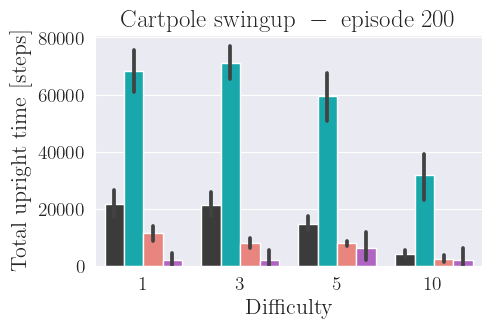

In [9]:
df = get_cumulative_upright_full(data, agents, sizes, T)
sns.set_style("darkgrid", rc=rc_parameters)
colors = ['#f8766d', '#00bfc4', 'mediumorchid','#3B3B3B','#0096FF','#a3a500']
color_dict = {agent: color for agent, color in zip(['BSP', 'DBMF-BPI', 'IDS', 'BSP2'], colors)}

fig, ax = plt.subplots(1,1, figsize=(9,4))
sns.barplot(x="n", y="Value", hue="Agent", data=df, palette=color_dict)
plt.xlabel(r'$\mathrm{Difficulty}$')
plt.ylabel(r'$\mathrm{Total \ upright \ time \ [steps]}$')
plt.title(r'$\mathrm{Cartpole \ swingup \ problem}$')
plt.legend()
plt.savefig('figures/total_upright_time_barplot.pdf', bbox_inches='tight')



colors = ['#f8766d', '#00bfc4', 'mediumorchid','#3B3B3B','#0096FF','#a3a500']
color_dict = {agent: color for agent, color in zip(['BSP', 'DBMF-BPI', 'IDS', 'BSP2'], colors)}

fig, ax = plt.subplots(1,1, figsize=(5,3))
sns.barplot(x="n", y="Value", hue="Agent", data=df, palette=color_dict)
plt.xlabel(r'$\mathrm{Difficulty}$')
plt.ylabel(r'$\mathrm{Total \ upright \ time \ [steps]}$')
plt.title(r'$\mathrm{Cartpole \ swingup \ - \ episode \ 200}$')
ax.get_legend().remove() 
# plt.legend()
plt.savefig('figures/total_upright_time_barplot_small.pdf', bbox_inches='tight')

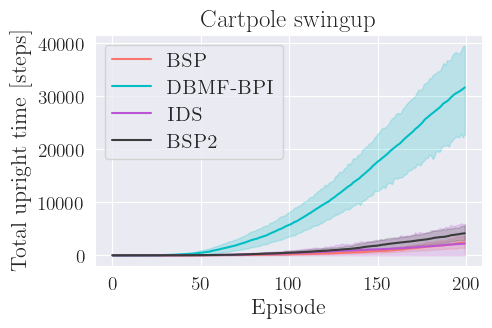

In [6]:
sns.set_style("darkgrid",rc=rc_parameters)

fig, ax = plt.subplots(1,1, figsize=(5,3))
colors = ['#f8766d', '#00bfc4', 'mediumorchid','#3B3B3B','#0096FF','#a3a500']
labels = {
    'boot_dqn_torch': r'\textsc{BSP}',
    'boot_dqn_torch_modified': r'\textsc{BSP2}',
    'explorative': r'\textsc{DBMF-BPI}',
    'ids': r'\textsc{IDS}',

}

for size in [10]:
    for agent_id, agent in enumerate(['boot_dqn_torch', 'explorative','ids','boot_dqn_torch_modified']):
        ret1,df1 = get_cumulative_upright(data[agent][size], T)
        sns.lineplot(x='Episode', y='Value', data=df1, label=labels[agent], color=colors[agent_id])

plt.xlabel(r'$\mathrm{Episode}$')
plt.ylabel(r'$\mathrm{Total \ upright \ time \ [steps]}$')
plt.title(r'$\mathrm{Cartpole \ swingup}$')
plt.legend()
plt.savefig('figures/total_upright_time_10.pdf', bbox_inches='tight')

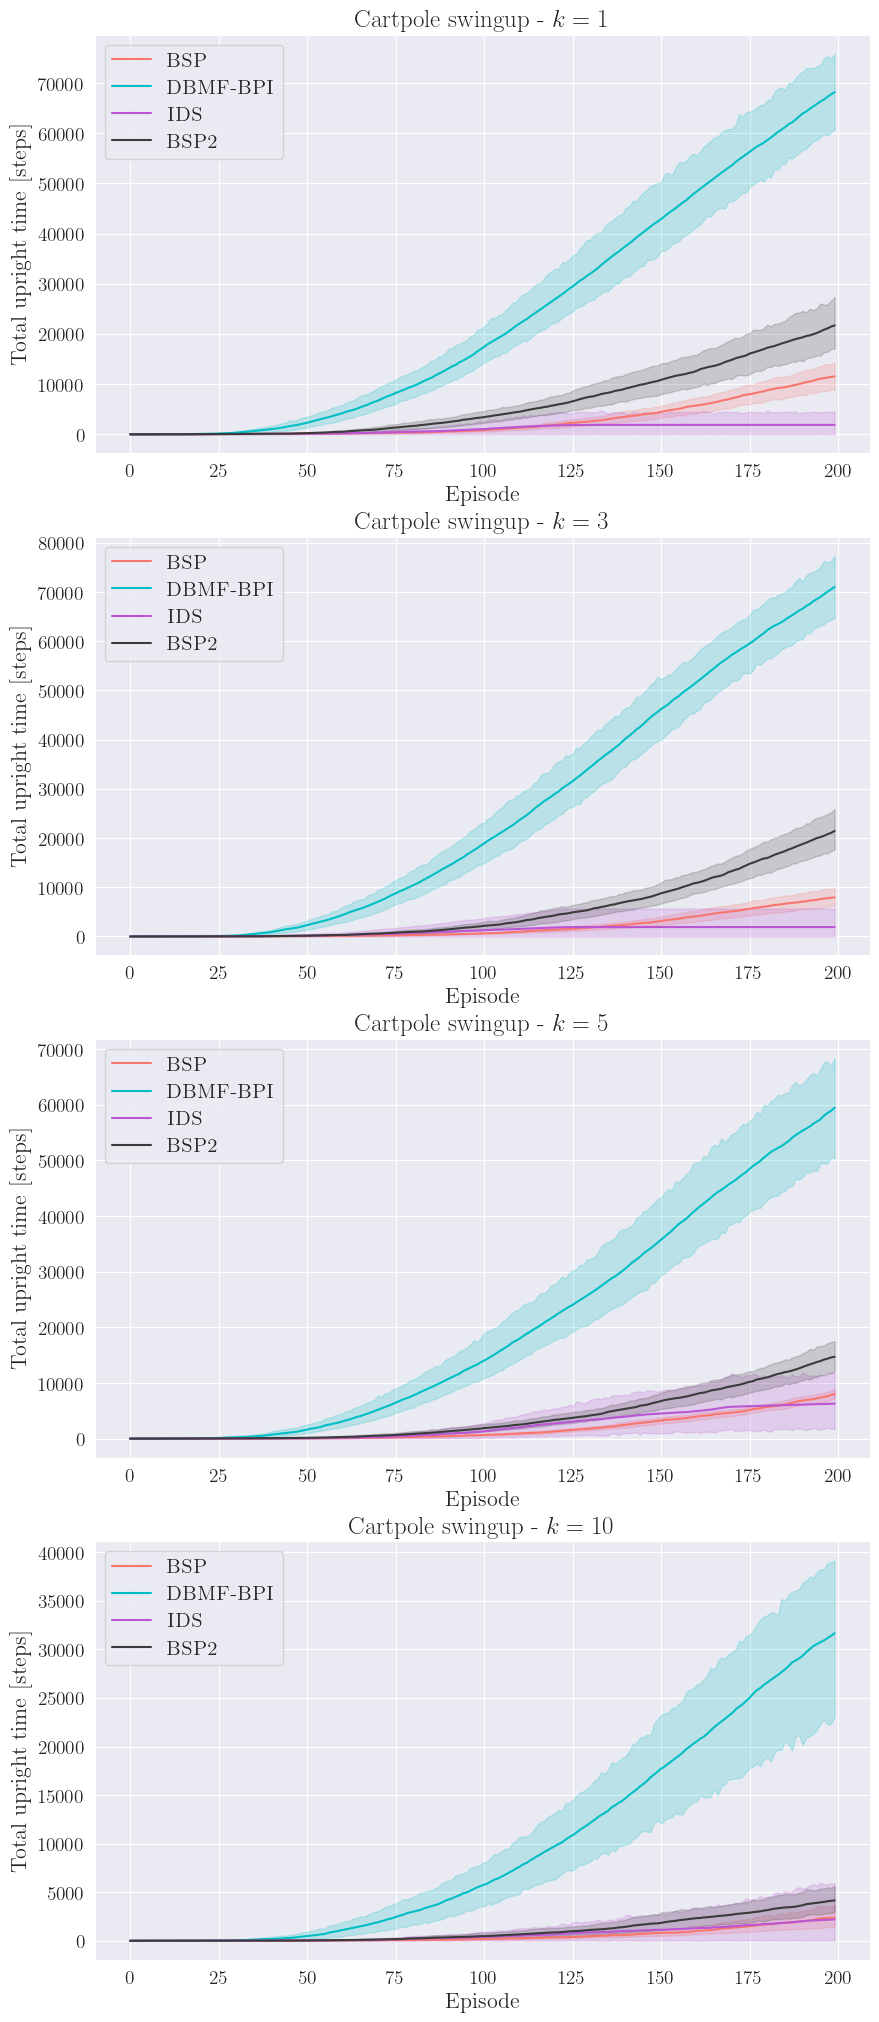

In [7]:
sns.set_style("darkgrid", rc=rc_parameters)

fig, ax = plt.subplots(4,1, figsize=(10,25))
colors = ['#f8766d', '#00bfc4', 'mediumorchid','#3B3B3B','#0096FF','#a3a500']
labels = {
    'boot_dqn_torch': r'\textsc{BSP}',
    'boot_dqn_torch_modified': r'\textsc{BSP2}',
    'explorative': r'\textsc{DBMF-BPI}',
    'ids': r'\textsc{IDS}',

}

for axis_id, size in enumerate([1,3,5,10]):
    for agent_id, agent in enumerate(['boot_dqn_torch', 'explorative','ids','boot_dqn_torch_modified']):
        ret1,df1 = get_cumulative_upright(data[agent][size], T)
        sns.lineplot(x='Episode', y='Value', data=df1, label=labels[agent], color=colors[agent_id], ax=ax[axis_id])

    ax[axis_id].set_xlabel(r'$\mathrm{Episode}$')
    ax[axis_id].set_ylabel(r'$\mathrm{Total \ upright \ time \ [steps]}$')
    ax[axis_id].set_title(r'$\mathrm{Cartpole \ swingup}$ - ' + f'$k={size}$')
    ax[axis_id].legend()
plt.savefig('figures/total_upright_time_full.pdf', bbox_inches='tight')